<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(1_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n250.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n20.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.277962,70.069091,60.713154,-2.157297,209.902910,208.049905,1.853005
1,0.0,1.0,74.202998,71.991151,51.052133,-30.754969,176.491313,202.167340,-25.676027
2,0.0,2.0,68.359279,26.146495,25.577068,3.342785,133.425626,129.131384,4.294242
3,0.0,3.0,73.305577,60.812274,82.711756,-0.277077,226.552530,225.814953,0.737578
4,0.0,4.0,61.389907,61.270115,88.487699,-3.937110,217.210611,220.662474,-3.451863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,22.858186,75.460912,57.014106,15.511726,180.844929,167.063806,13.781123
19996,999.0,16.0,54.359719,96.272088,48.615044,-12.939743,196.307109,205.065429,-8.758320
19997,999.0,17.0,22.905953,51.689371,85.440107,21.588917,191.624348,172.631338,18.993010
19998,999.0,18.0,50.565648,98.249741,55.663592,4.269775,218.748756,210.851073,7.897684


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.277962,70.069091,60.713154,-2.157297,209.902910,208.049905,1.853005
1,0.0,1.0,74.202998,71.991151,51.052133,-30.754969,176.491313,202.167340,-25.676027
2,0.0,2.0,68.359279,26.146495,25.577068,3.342785,133.425626,129.131384,4.294242
3,0.0,3.0,73.305577,60.812274,82.711756,-0.277077,226.552530,225.814953,0.737578
4,0.0,4.0,61.389907,61.270115,88.487699,-3.937110,217.210611,220.662474,-3.451863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,22.858186,75.460912,57.014106,15.511726,180.844929,167.063806,13.781123
19996,999.0,16.0,54.359719,96.272088,48.615044,-12.939743,196.307109,205.065429,-8.758320
19997,999.0,17.0,22.905953,51.689371,85.440107,21.588917,191.624348,172.631338,18.993010
19998,999.0,18.0,50.565648,98.249741,55.663592,4.269775,218.748756,210.851073,7.897684


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    71.277962  70.069091  60.713154  ...  209.902910  208.049905   1.853005
      1.0    74.202998  71.991151  51.052133  ...  176.491313  202.167340 -25.676027
      2.0    68.359279  26.146495  25.577068  ...  133.425626  129.131384   4.294242
      3.0    73.305577  60.812274  82.711756  ...  226.552530  225.814953   0.737578
      4.0    61.389907  61.270115  88.487699  ...  217.210611  220.662474  -3.451863
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   22.858186  75.460912  57.014106  ...  180.844929  167.063806  13.781123
      16.0   54.359719  96.272088  48.615044  ...  196.307109  205.065429  -8.758320
      17.0   22.905953  51.689371  85.440107  ...  191.624348  172.631338  18.993010
      18.0   50.565648  98.249741  55.663592  ...  218.748756  210.851073   7.897684
      19.0   28.924614  39.084507  37.654471  ...   98.453867  117.703255 -19.249389

[20000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    71.277962  70.069091  60.713154  ...  209.902910  208.049905   1.853005
      1.0    74.202998  71.991151  51.052133  ...  176.491313  202.167340 -25.676027
      2.0    68.359279  26.146495  25.577068  ...  133.425626  129.131384   4.294242
      3.0    73.305577  60.812274  82.711756  ...  226.552530  225.814953   0.737578
      4.0    61.389907  61.270115  88.487699  ...  217.210611  220.662474  -3.451863
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   22.858186  75.460912  57.014106  ...  180.844929  167.063806  13.781123
      16.0   54.359719  96.272088  48.615044  ...  196.307109  205.065429  -8.758320
      17.0   22.905953  51.689371  85.440107  ...  191.624348  172.631338  18.993010
      18.0   50.565648  98.249741  55.663592  ...  218.748756  210.851073   7.897684
      19.0   28.924614  39.084507  37.654471  ...   98.453867  117.703255 -19.249389

[20000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.277962,70.069091,60.713154,-2.157297,209.902910,208.049905,1.853005
1,0.0,1.0,74.202998,71.991151,51.052133,-30.754969,176.491313,202.167340,-25.676027
2,0.0,2.0,68.359279,26.146495,25.577068,3.342785,133.425626,129.131384,4.294242
3,0.0,3.0,73.305577,60.812274,82.711756,-0.277077,226.552530,225.814953,0.737578
4,0.0,4.0,61.389907,61.270115,88.487699,-3.937110,217.210611,220.662474,-3.451863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,22.858186,75.460912,57.014106,15.511726,180.844929,167.063806,13.781123
19996,999.0,16.0,54.359719,96.272088,48.615044,-12.939743,196.307109,205.065429,-8.758320
19997,999.0,17.0,22.905953,51.689371,85.440107,21.588917,191.624348,172.631338,18.993010
19998,999.0,18.0,50.565648,98.249741,55.663592,4.269775,218.748756,210.851073,7.897684


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    71.277962  70.069091  60.713154  ...  209.902910  208.049905   1.853005
      1.0    74.202998  71.991151  51.052133  ...  176.491313  202.167340 -25.676027
      2.0    68.359279  26.146495  25.577068  ...  133.425626  129.131384   4.294242
      3.0    73.305577  60.812274  82.711756  ...  226.552530  225.814953   0.737578
      4.0    61.389907  61.270115  88.487699  ...  217.210611  220.662474  -3.451863
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   22.858186  75.460912  57.014106  ...  180.844929  167.063806  13.781123
      16.0   54.359719  96.272088  48.615044  ...  196.307109  205.065429  -8.758320
      17.0   22.905953  51.689371  85.440107  ...  191.624348  172.631338  18.993010
      18.0   50.565648  98.249741  55.663592  ...  218.748756  210.851073   7.897684
      19.0   28.924614  39.084507  37.654471  ...   98.453867  117.703255 -19.249389

[20000 rows x 7 columns]

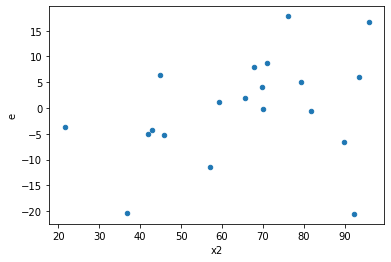

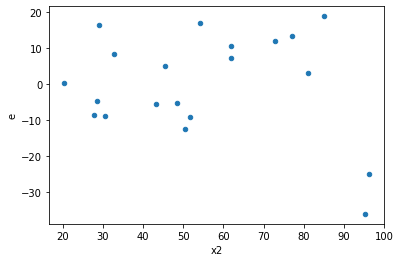

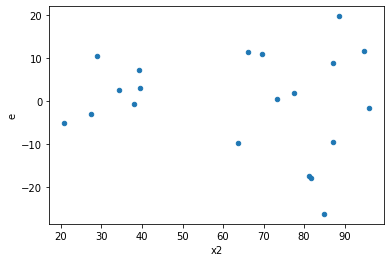

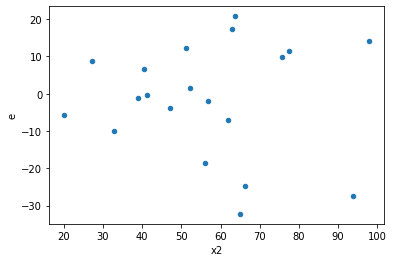

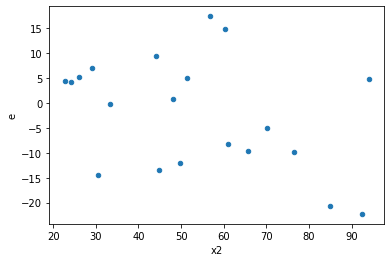

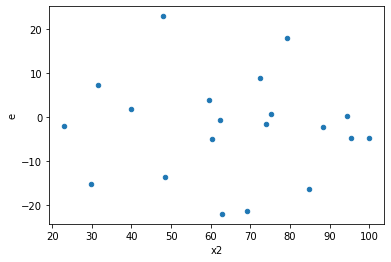

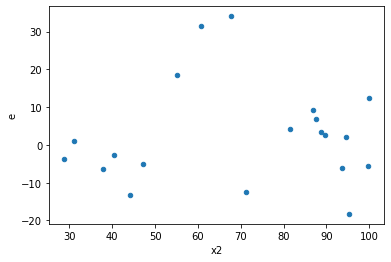

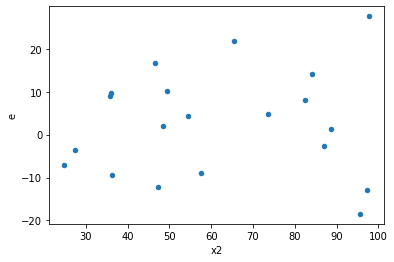

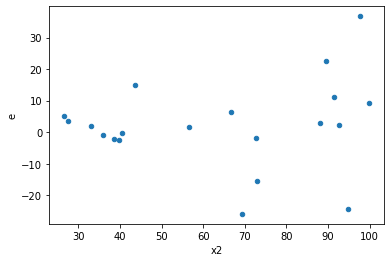

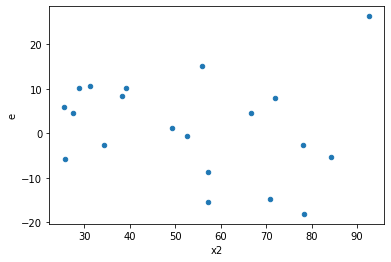

In [13]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,573.7262297788494,1071.5072509644028,114.74524595576989,214.30145019288057,1.8676281392562961,0.5095425247185723,0.7452287376407138,0.25477126235928615,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,49.46723053605207,1697.6003314394445,9.893446107210414,339.5200662878889,34.31767481307087,0.001421492371421973,0.999289253814289,0.0007107461857109865,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,417.20304837698825,1398.5271087671383,83.44060967539765,279.7054217534277,3.352149784637761,0.21039590085943494,0.8948020495702825,0.10519795042971747,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,165.49763187613544,362.3466704281459,33.099526375227086,72.46933408562919,2.1894371920641116,0.40998506285319625,0.7950074685734019,0.20499253142659812,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,226.29424823709246,574.9850048562665,45.258849647418494,114.9970009712533,2.540873262734652,0.32915222835273994,0.83542388582363,0.16457611417636997,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,296.3562513539602,961.9839065824433,59.27125027079204,192.39678131648867,3.2460388542081904,0.22216018413682503,0.8889199079315875,0.11108009206841252,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,262.7980396497805,668.5717583639415,52.5596079299561,133.7143516727883,2.5440515433635573,0.32852486839830064,0.8357375658008497,0.16426243419915032,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,364.5801631847973,988.7869251716849,72.91603263695946,197.75738503433698,2.712124863114101,0.2975539032916097,0.8512230483541952,0.14877695164580484,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,411.2441195515572,600.9402205188803,82.24882391031144,120.18804410377606,1.4612737105497775,0.6873963933806126,0.6563018033096937,0.3436981966903063,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,573.7262297788494,1071.5072509644028,114.74524595576989,214.30145019288057,1.8676281392562961,0.5095425247185723,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,49.46723053605207,1697.6003314394445,9.893446107210414,339.5200662878889,34.31767481307087,0.001421492371421973,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,417.20304837698825,1398.5271087671383,83.44060967539765,279.7054217534277,3.352149784637761,0.21039590085943494,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,165.49763187613544,362.3466704281459,33.099526375227086,72.46933408562919,2.1894371920641116,0.40998506285319625,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,226.29424823709246,574.9850048562665,45.258849647418494,114.9970009712533,2.540873262734652,0.32915222835273994,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,296.3562513539602,961.9839065824433,59.27125027079204,192.39678131648867,3.2460388542081904,0.22216018413682503,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,262.7980396497805,668.5717583639415,52.5596079299561,133.7143516727883,2.5440515433635573,0.32852486839830064,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,364.5801631847973,988.7869251716849,72.91603263695946,197.75738503433698,2.712124863114101,0.2975539032916097,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,411.2441195515572,600.9402205188803,82.24882391031144,120.18804410377606,1.4612737105497775,0.6873963933806126,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      812
Reject005=0 : Heteroscedasticity    188
Name: Result_test, dtype: int64